<a href="https://colab.research.google.com/github/BurnTheBunsen/pytorch-deep-learning-test/blob/main/Pytorch_Workflow_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
what_were_covering = {1: "data (preparing and loading)",
                      2: "build a model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
                      }
what_were_covering

{1: 'data (preparing and loading)',
 2: 'build a model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [80]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.__version__

'2.8.0+cu126'

##1. Data preparing and loading
A. Get data into a numerical representation

B. Build a model to learn patterns in that numerical representation

In [81]:
# Create a known parameter
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
# Why is X capital here? because it is typically a matrix or a tensor
X =  torch.arange(start, end, step).unsqueeze(dim=1) # This is our input
y = weight * X + bias # This is our ideal output
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

# Splitting data into training and test sets (one of the most impotant conceptst in ML in general)
So we have 3 sets of data:
1. Training set 60~80%
2. Validation set (You dont always use this one) 10~20%
3. Test set 10~20%

In [82]:
#Create a train/test split
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [83]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

# How can we better visualize our data?

In [84]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot training data in blue
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

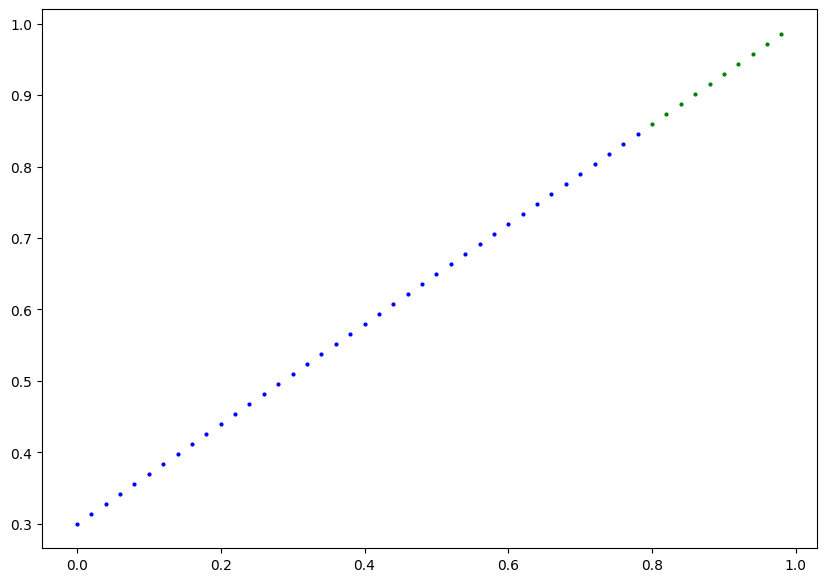

In [85]:
plot_predictions()

## 2. Build model

Our first PyTorch model


In [86]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    #"requires_grad=True" just tells pytorch that this parameter
    #is supposed to be updated via
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # We pass little x because quite often little x is passed and not the capital one
    return self.weights * x + self.bias #This is the linear regression formula


### PyTorch model building essentials

* torch.nn -> Contains all of the buildings for computational graphs
* torch.nn.Parameter -> What params should our model try and Learn
* torch.nn.Module -> The base class for all NN modules, if you subclass it you should overwrite forward()
* torch.optim -> This is where the optimizers live and they will help with Gradian Descent
* def forward() -> All nn.Module subclasses require you to overwrite forward()

### PyTorch Workflow
1. Get data ready
 * torchvision.tranforms
 * torch.utils.data.Dataset
 * torch.utils.data.DataLoader
2. Build or pick a model
  * torch.nn
  * torch.nn.Module
  * torchvision.models
3. Fit the model to the data and make a prediction

4. Evaluate the model
  * torchmetrics
5. Improve through experimentation
  * torch.utils.tensorboard
6. Save and reload your trained model


### Checking the contents of out PyTorch model

Now we've created a model, lets see whats inside.

So we can check our model parameters or whats inside using `.parameters()`

In [87]:
# Create a random seed
torch.manual_seed(42)

# Create a model instance
model_0 = LinearRegressionModel()

# Check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [88]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode`

To check our model's predctive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the forward method.

In [89]:
# Make predictions with model
# So with the word "With" here it makes things faster and makes sure
# that we dont accidentaly modify our model and hange its gradients.
with torch.inference_mode(): # Inference here turns off the gradient tracking
  y_preds = model_0(X_test)

# We could use the `torch.no_grad():` here as well but it doesnt
# save up on memory and its partially inferior.

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

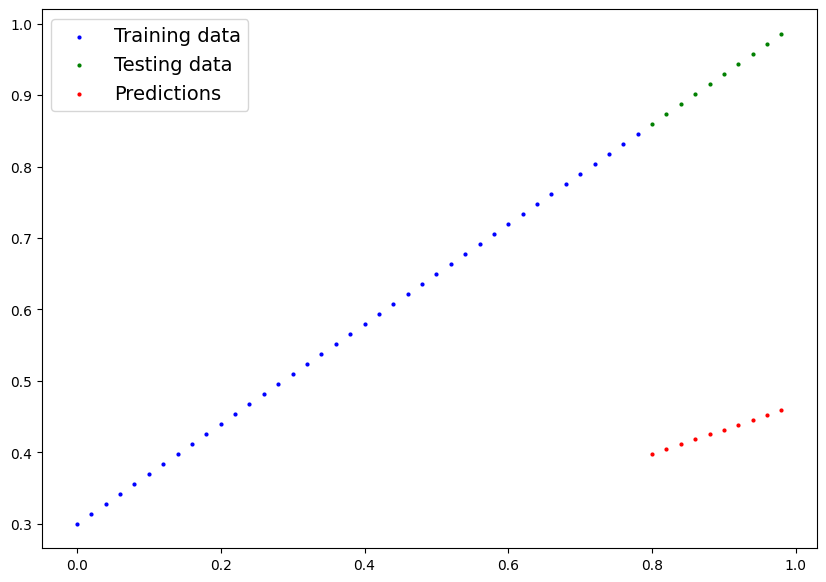

In [90]:
plot_predictions(predictions=y_preds)

## 3. Train your model

The whole idea of training a model is for a model to move from some
unknown params (could be random) to some *known* param.

or in other words from a poor representation of the data to a better representation
of our data

One way to measure how poor or how wrong our model's predictions are to use a loss function.

We have a fair few Loss Function built in. (Keep in mind that they can be reffered to as Cost function or criterion.

Things we need to train:

* **Loss function:** A function to measure how wrong our output is compared to our actual expected output. Lower is obv better.
* **Optimizer: ** Takes into account the loss of a model and adjusts the model's params.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [91]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [92]:
# But if we want to get this list as labeled and more defined
# We can use this command
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [105]:
# Setup a Loss Function
loss_fn = nn.L1Loss() # MAE Loss

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) # lr = Learning rate = possibly the most important hyperparameteryo u can set
# if lr = 0.001 its the decimal that it will adjust in each hit
# for example if our first component in our tensor is 0.3871 it will start changing
#from 0.007 of 0.3871

### How do we decide which loss function and optimizer should we use in our project and for our model?

This is completely probem-specific. But further down the line we will get a sense of what works for our model and what doesnt.

For example, for a regression problem like we have here, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, we'll likely use a loss function of `nn.BCELoss` (Binary cross entropy loss)

Really useful resource for this part:
https://www.cmarix.com/qanda/choosing-the-right-loss-function-for-ai-model-training/?utm_source=chatgpt.com

### Now we are going to make a training loop and a testing loop that we can use to train our model

0. Loop through the data
1. Forward pass (this involbed data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - moves backward through our Network to calculate the gradients of each of the parameters of our model with respect to the loss (**BackPropagation**)
5. Optimizer step - use the optimizer to adjust our model's params to try and improve the loss (**Gradient Descent**)

In [111]:
# Epoch is the number of our loops (It is a hyperparam because we set it ourselves)
epochs = 2

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # trainmode in pytorch sets all params that require grads to True

  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2. Calculate the Loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad() # We have to zero it out
  # 4. Perform backprop on the loss with respect to the params of the model
  loss.backward()
  # 5. Step the optimizer (perform Gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not neede for evaluation/testing (dropout and batchnorm)
  with torch.inference_mode(): # turns off gradiet tracking and a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what is actually happening
  print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  # print out the model state_dict()
  print(model_0.state_dict())



Loss: 0.00028008074150420725
OrderedDict({'weights': tensor([0.6991]), 'bias': tensor([0.2995])})
Loss: 0.0008720018086023629
OrderedDict({'weights': tensor([0.6995]), 'bias': tensor([0.3005])})


In [104]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [109]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8601],
        [0.8741],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

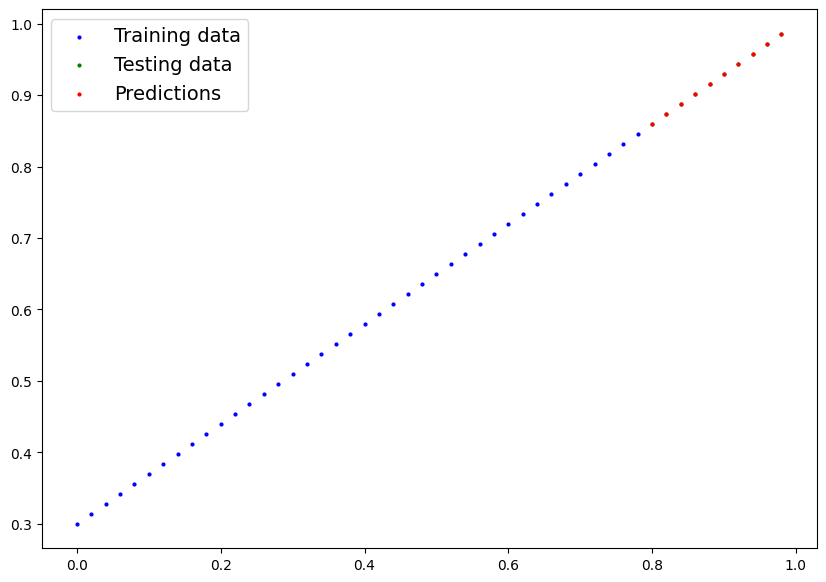

In [110]:
plot_predictions(predictions=y_preds_new);